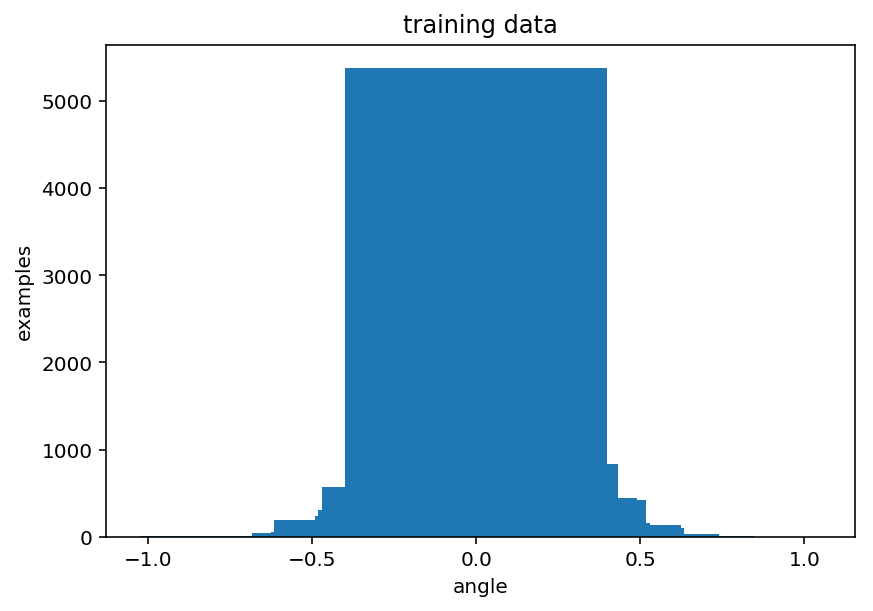

Counter({-0.6223675: 2,
         -0.5933188: 1,
         -0.5255386: 1,
         -0.5061729: 1,
         -0.49649: 2,
         -0.4868071: 1,
         -0.4577585: 1,
         -0.4287098: 1,
         -0.4190269: 5,
         -0.409344: 2,
         -0.3996612: 2,
         -0.3802953: 1,
         -0.3706124: 3,
         -0.3609296: 12,
         -0.3512467: 3,
         -0.3415638: 4,
         -0.3318809: 4,
         -0.322198: 8,
         -0.3125151: 9,
         -0.3028322: 10,
         -0.2931494: 5,
         -0.2834665: 41,
         -0.2737836: 18,
         -0.2641007: 39,
         -0.2544178: 17,
         -0.2447349: 6,
         -0.235052: 28,
         -0.2253692: 56,
         -0.2156863: 196,
         -0.2060034: 45,
         -0.1963205: 42,
         -0.1866376: 23,
         -0.1769547: 22,
         -0.1672719: 178,
         -0.157589: 117,
         -0.1479061: 103,
         -0.1382232: 152,
         -0.1285403: 91,
         -0.1188574: 32,
         -0.1091745: 25,
         -0.09949167:

In [21]:
import csv
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

file = './data/6/driving_log.csv'

def read(file):
    with open(file) as csvfile:
        reader = csv.reader(csvfile)
        return [float(line[3]) for line in reader]
    
angles = read(file)

angles

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter as Counter
class_counts = Counter(angles)

y_pos = list(class_counts.values())
x_pos = list(class_counts)

plt.bar(x_pos,y_pos, align='center')
plt.tight_layout()
plt.xlabel('angle')
plt.ylabel('examples')
plt.title('training data')
plt.show()

class_counts
